# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV
from sklearn import metrics



# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

# read the data
import pandas as pd
# read the data using the pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/DS/INNHotelsGroup.csv')

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
# returns the first 5 rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


####Observations####

1.   We have 19 columns and first 5 records are fetched.



In [ ]:
# return the shape of the data set
df.shape

(36275, 19)

####Observations####

1.   We have 36275 rows and 19 columns in dataset.



In [ ]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

####Observations####

1.  info() returns pandas dataframe and has total of 19 columns .
2.  It is observed there is 1 column(s) with float64 dataype, 13 column(s) with int64 and 5 column(s) with object Data type.
3. In total, info() uses memory usage of 5.3+ KB.
4. There are 4 columns( Column, Non-Null, Count, Dtype) with 19 rows.


In [ ]:
# Statistical summary of the dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


####Observations####

1.  It is observed that average value(s) of lead_time, avg_price_per_room, no_of_special_requests is greater than the median indicating the data is slightly positively skewed.
2. It is observed that most preferred room type is "Room_Type 1".



In [ ]:
# Check the NULL values in the dataframe

print (df.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


####Observations####

1.   It is observed that no duplicate values are found in any of the columns in dataset.




In [ ]:
# Find the duplicate rows in the data set

dups = df[df.duplicated()]

if dups.empty:
  print ("No duplicates found in the Dataset")
else:
  print (dups)

No duplicates found in the Dataset


####Observations####

1.   It is observed that no duplicates are found in the dataset.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

# Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

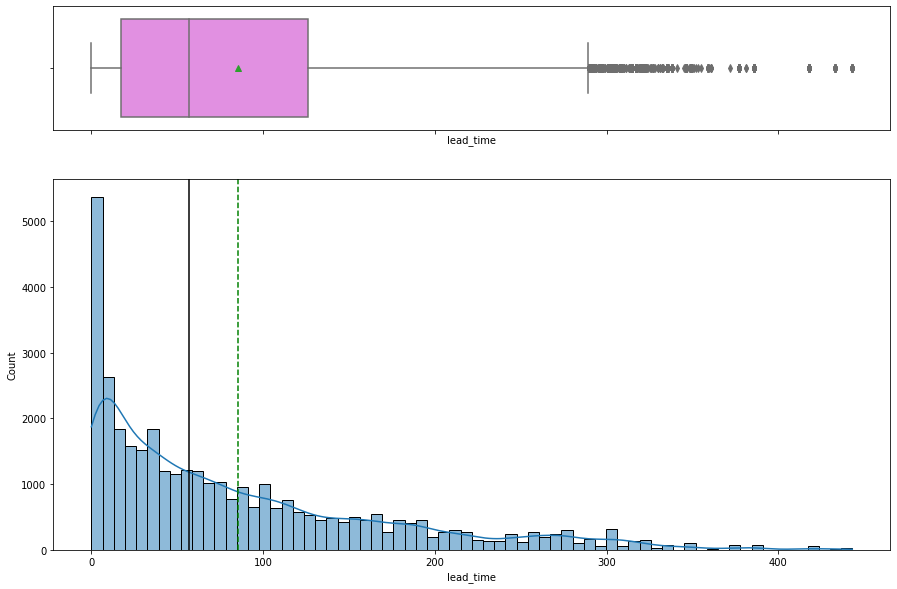

In [ ]:
# Below Histplot and boxplot show the data for the lead_time column.

histogram_boxplot(df, "lead_time")

####Observations#####

1.   It is observed that the average lead time is around 85 days .
2.   It is observed that there are lot of outliers in the data set .
3.   Dataset for the column lead_time is right skewed, as the mean is greater than the median.
4. It is observed that highest lead_time has very less number of days(i.e, the maximum number of bookings have very less gap between the booking time and arrival date).



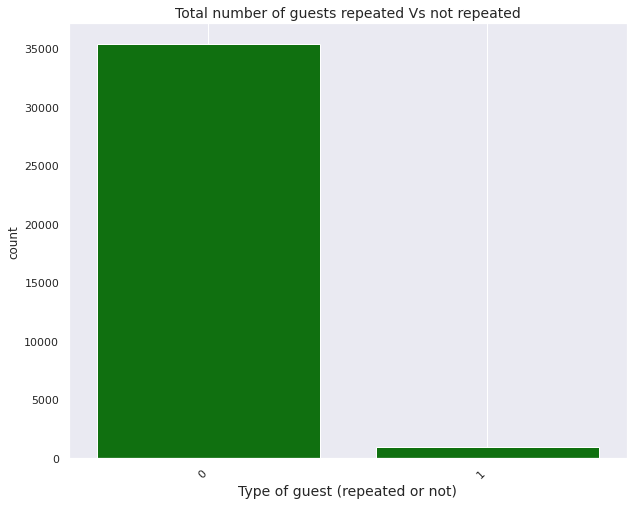

In [ ]:

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the countplot used with seaborn library on the X-axis as repeated_guest and dataframe 'df'

sns.countplot(data=df, x='repeated_guest', color="green")

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Type of guest (repeated or not)', fontsize=14)
plt.title ('Total number of guests repeated Vs not repeated', fontsize=14);
plt.grid()

####Observations#####

1.   It is observed that Total guests with 1 ( Yes) are very less and 930.
2.   It is observed that Total guests with 0 (No) are high in number and  35345.



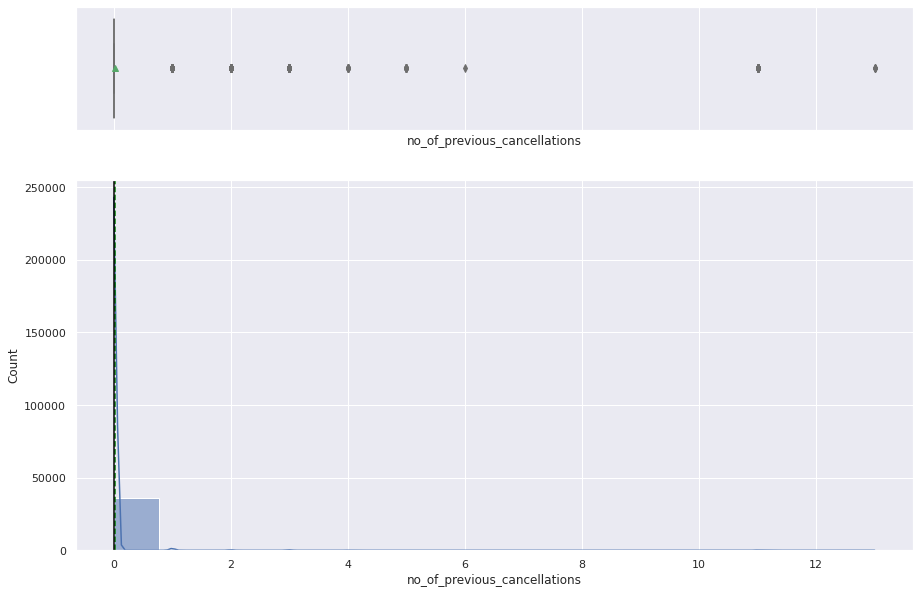

In [ ]:
# Below Histplot and boxplot show the data for the no_of_previous_cancellation column.

histogram_boxplot(df, "no_of_previous_cancellations")

####Observations####


1.   It is observed there are very high number around 35937  of previous bookings that were cancelled by the customer prior to the current booking on same day.



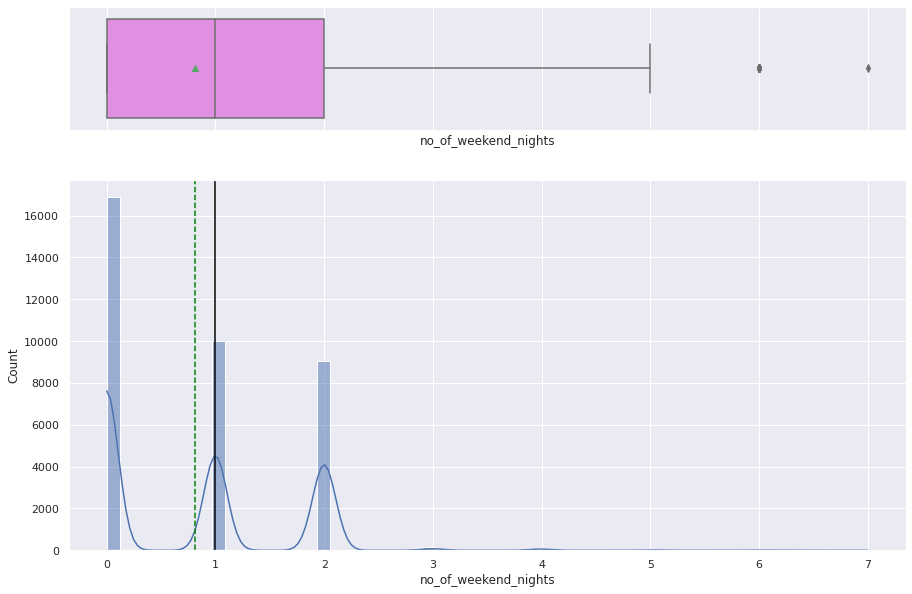

In [ ]:
# Below Histplot and boxplot show the data for the no_of_weekend_nights column.

histogram_boxplot(df, "no_of_weekend_nights")

####Observations####

1. It is observed that on average customers spend 1 night and data is negatively skewed .
2. It is observed that there are few outliers for the above data.



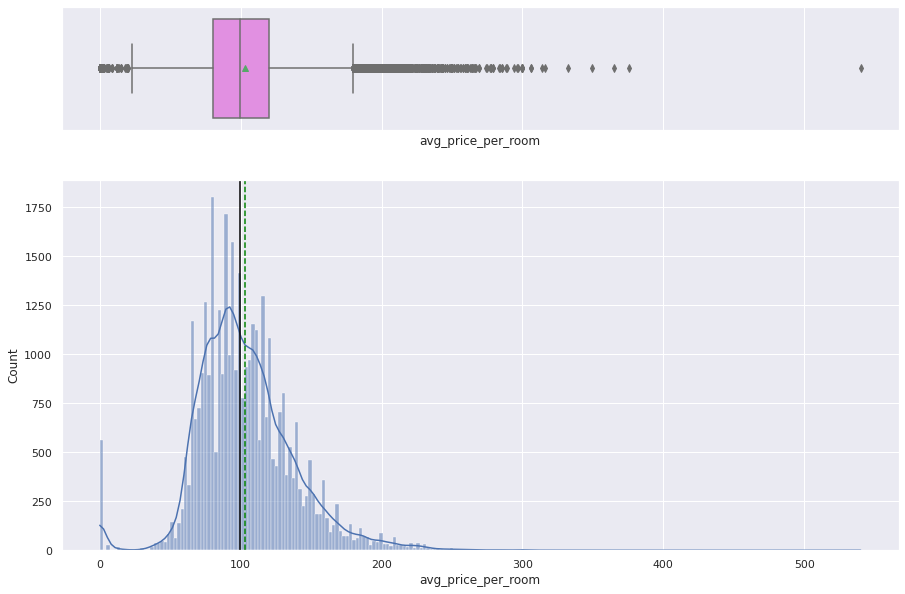

In [ ]:
# Below Histplot and boxplot show the data for the avg_price_per_room column.

histogram_boxplot(df, "avg_price_per_room")

####Observations####

1. It is observed that lot of outliers are present in the above data .
2. It is observed that average price per room is approximately 103 and data looks almost symmetrical.




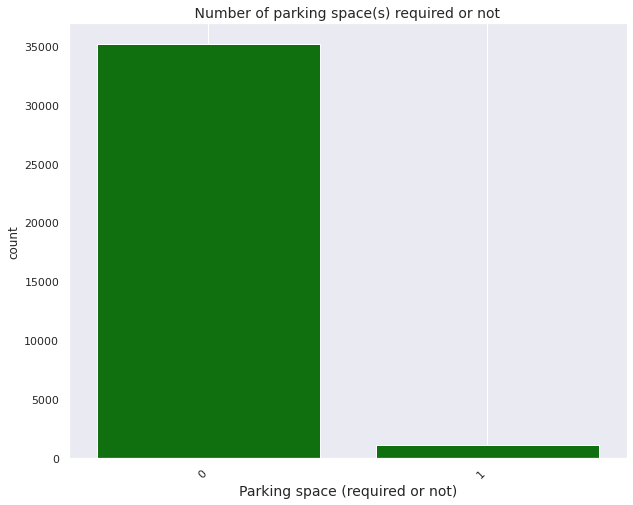

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the countplot used with seaborn library on the X-axis as required_car_parking_space and dataframe 'df'

sns.countplot(data=df, x='required_car_parking_space', color="green")

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Parking space (required or not)', fontsize=14)
plt.title (' Number of parking space(s) required or not ', fontsize=14);
plt.grid()

####Observations####

1.   It is observed that 97% of the customers donot prefer the car parking space .
2.   It is observed that around 3% of the customers prefer the car parking space.



   arrival_year  counts
0          2017    6514
1          2018   29761


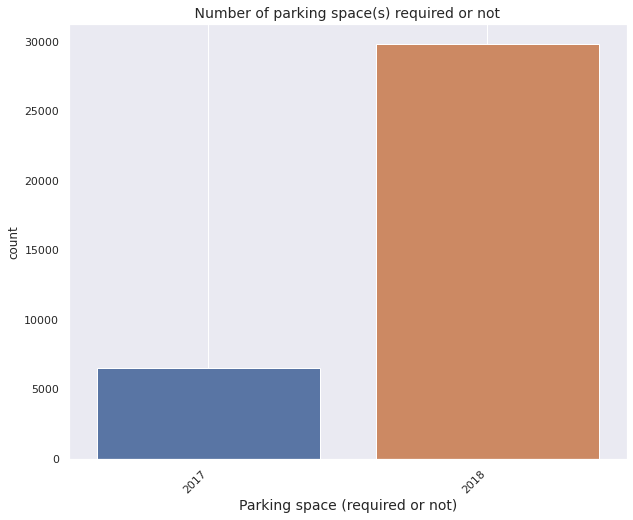

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the countplot used with seaborn library on the X-axis as arrival_year and dataframe 'df'

sns.countplot(data=df, x='arrival_year')

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Parking space (required or not)', fontsize=14)
plt.title (' Number of parking space(s) required or not ', fontsize=14);
plt.grid()

# To check the exact count of customer(s) on yearly basis

customer_per_year = df.groupby('arrival_year').size().reset_index()
customer_per_year.columns=['arrival_year','counts']
print (customer_per_year)


####Observations####


1.   It is observed that huge increase of the customers for the 2018 compared to previous year.
2.   Total number of customers in 2018 were 29761, compared to 2017 were 6514.



    arrival_month  counts
11             12    3021
10             11    2980
9              10    5317
8               9    4611
7               8    3813
6               7    2920
5               6    3203
4               5    2598
3               4    2736
2               3    2358
1               2    1704
0               1    1014


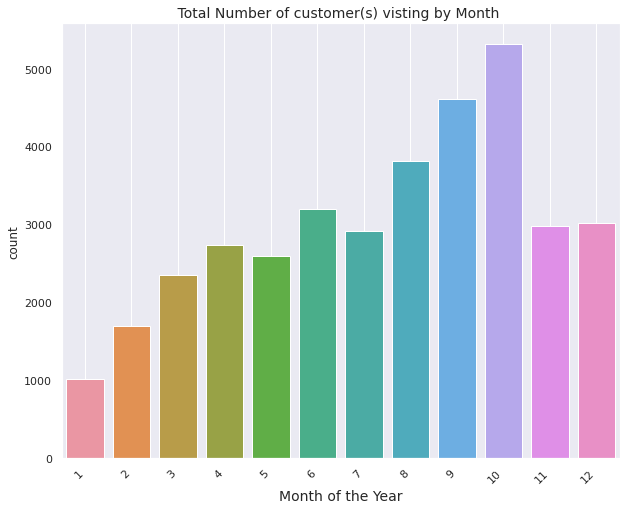

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the countplot used with seaborn library on the X-axis as arrival_month and dataframe 'df'

sns.countplot(data=df, x='arrival_month')

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Month of the Year', fontsize=14)
plt.title (' Total Number of customer(s) visting by Month  ', fontsize=14);
plt.grid()

# To check the exact count of customer(s) on yearly basis

customer_per_year = df.groupby('arrival_month').size().reset_index().sort_values(by=['arrival_month'], ascending=False)
customer_per_year.columns=['arrival_month','counts']
print (customer_per_year)


####Observations####

1. It is observed that maximum number of customers visit during the month 10.

# Bivariate Analysis

<Figure size 1584x720 with 0 Axes>

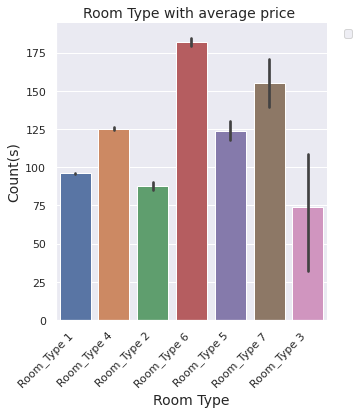

In [ ]:
''' Find out which room is reserved  , and its average price(s)  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))


sns.catplot(data=df, x='room_type_reserved', y='avg_price_per_room', kind='bar');


# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('Room Type with average price ', fontsize=14);

####Observations#####

1.   It is observed that Room_Type 6 has the average high price followed by Room_Type 7.




<Figure size 1584x720 with 0 Axes>

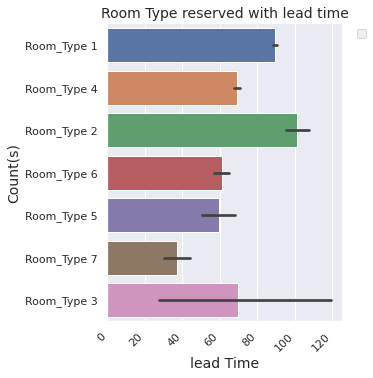

In [ ]:
''' Find out which room is reserved  , and customer preference and its lead time(s)  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(22,10))


sns.catplot(data=df, x='lead_time', y='room_type_reserved', kind='bar');


# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('lead Time', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('Room Type reserved with lead time', fontsize=14);


####Observations####

1.   It is observed that average lead time and most preferred room is Room Type 2
2.   It is observed that next averge lead time most preferred room is Romm Type 1.



   repeated_guest type_of_meal_plan  counts
0               0       Meal Plan 1   26945
1               0       Meal Plan 2    3296
2               0       Meal Plan 3       4
3               0      Not Selected    5100
4               1       Meal Plan 1     890
5               1       Meal Plan 2       9
6               1       Meal Plan 3       1
7               1      Not Selected      30


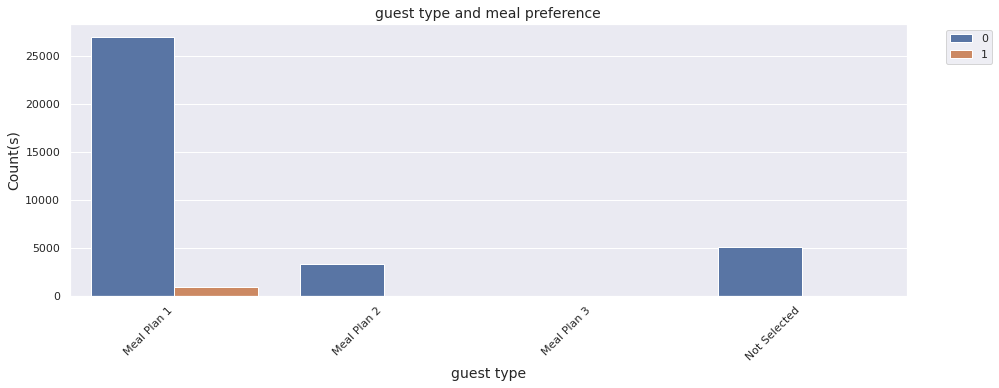

In [ ]:
''' Find out the guest preference of meal  , and type of customer  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,5))

repeated_customers_meal_plan_pref = df.groupby(['repeated_guest','type_of_meal_plan']).size().reset_index()
repeated_customers_meal_plan_pref.columns=['repeated_guest','type_of_meal_plan','counts']
print (repeated_customers_meal_plan_pref)

sns.barplot(data=repeated_customers_meal_plan_pref, x='type_of_meal_plan', y='counts', hue='repeated_guest');

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('guest type', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('guest type and meal preference', fontsize=14);

#print (df[(df['type_of_meal_plan'] == 'Meal Plan 1') & (df['repeated_guest'] == 0)].reset_index())

####Observations####

1.   It is observed that customers not repeated or new have preferred meal type 1 as first choice.
2.   It is observed that customers who are new have not selected any meal plan.
3. It is observed that preference of meal plan 3 is very less either in new customers or regular customers.



   repeated_guest booking_status  counts
0               0       Canceled   11869
1               0   Not_Canceled   23476
2               1       Canceled      16
3               1   Not_Canceled     914


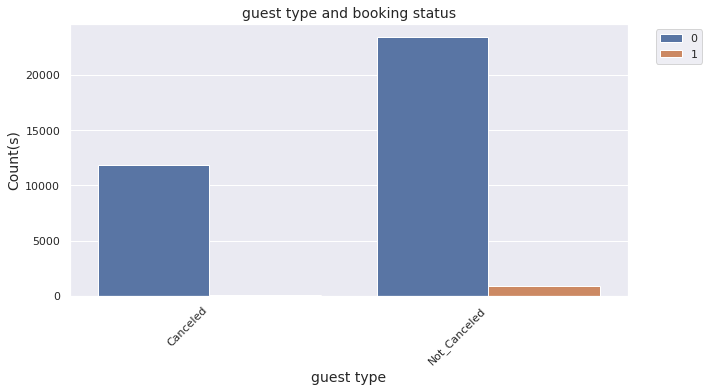

In [ ]:
''' Find out the guest booking status  , and type of customer  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,5))

repeated_customers_meal_plan_pref = df.groupby(['repeated_guest','booking_status']).size().reset_index()
repeated_customers_meal_plan_pref.columns=['repeated_guest','booking_status','counts']
print (repeated_customers_meal_plan_pref)

sns.barplot(data=repeated_customers_meal_plan_pref, x='booking_status', y='counts', hue='repeated_guest');

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('guest type', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('guest type and booking status', fontsize=14);

####Observations####

1.   It is observed that 11869 cancellations from new customers.
2.   It is observed that 23476 new customers have not cancelled their bookings.
3.   It is observed that only 16 already previous customers have cancelled their bookings.
4. It is observed that 914 of the previous customers have not cancelled their bookings.




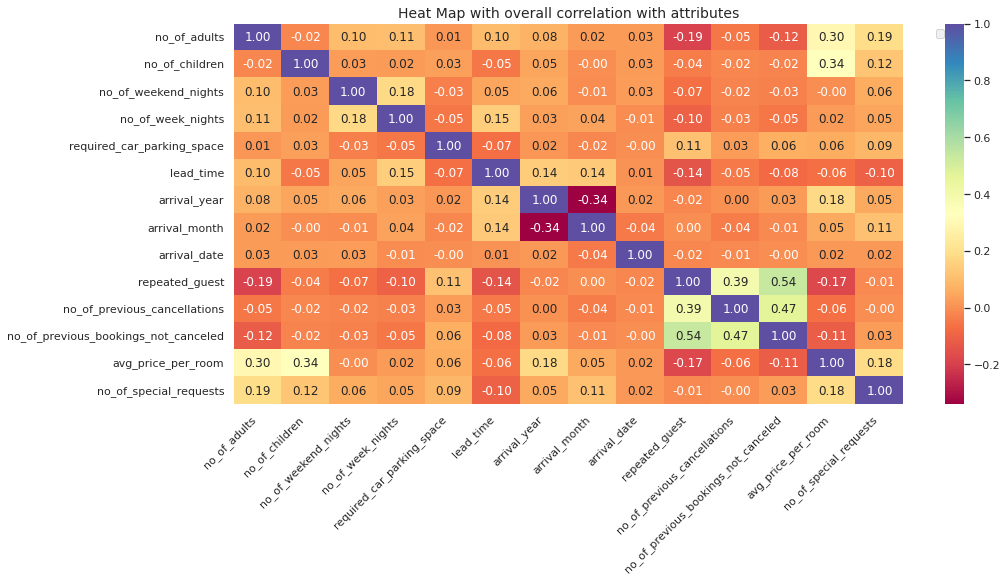

In [ ]:
''' Find out relation between different attributes  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,7))

# Below is the heatmap used with seaborn library on correlating the relation between different attributes  and  dataframe 'df'

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Spectral")

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.title ('Heat Map with overall correlation with attributes', fontsize=14);

####Observations####

1.   It is observed that no strong corelation is established between the attributes.
2.   It is observed that negative corelation is there between repeated guest who are adults .
3. It is observed that negative corelation is there between the arrival year and month, it could be reason customer(s) donot like booking during certain months in year.
4. It is observed that families with adults and children tend to choose rooms with  the average price .



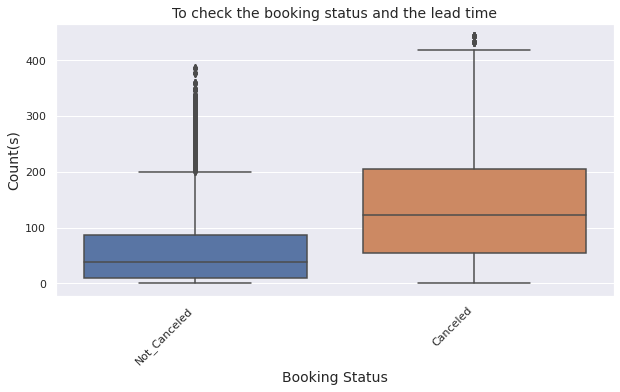

In [ ]:
''' Find out the guest booking status  , and lead time   '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,5))


sns.boxplot(data=df, x='booking_status', y='lead_time');

# xticks is used to rotate the x label

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Booking Status', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title('To check the booking status and the lead time', fontsize=14);

####Observations:

1.   It is observed that cancellations happen most of the time on or before 150 days of arrival approximately.




     market_segment_type booking_status  lead_time  counts
0               Aviation       Canceled          0       1
1               Aviation       Canceled          1       3
2               Aviation       Canceled          2       3
3               Aviation       Canceled          3       7
4               Aviation       Canceled          4       1
...                  ...            ...        ...     ...
1359              Online   Not_Canceled        320       2
1360              Online   Not_Canceled        327       1
1361              Online   Not_Canceled        332       3
1362              Online   Not_Canceled        346       1
1363              Online   Not_Canceled        351       1

[1364 rows x 4 columns]


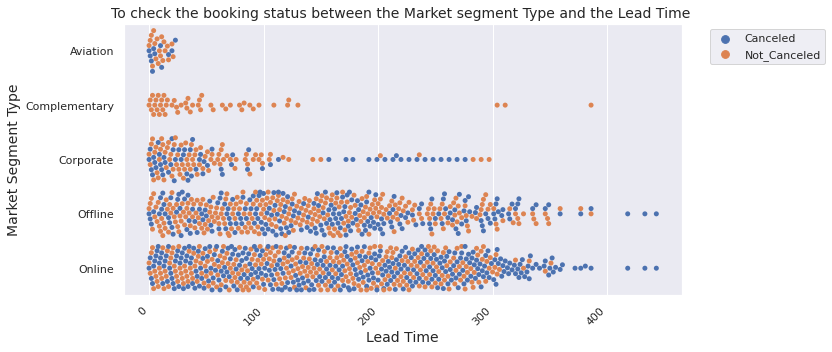

In [ ]:
''' Find out the Market segment Type and the booking status over the lead time  '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,5))

market_sgmnt_bkng_lead_tm_pref = df.groupby(['market_segment_type','booking_status','lead_time']).size().reset_index()
market_sgmnt_bkng_lead_tm_pref.columns=['market_segment_type','booking_status','lead_time','counts']
print (market_sgmnt_bkng_lead_tm_pref)

sns.swarmplot(data=market_sgmnt_bkng_lead_tm_pref, x='lead_time', y='market_segment_type', hue='booking_status');

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Lead Time', fontsize=14)
plt.ylabel('Market Segment Type', fontsize=14)
plt.title ('To check the booking status between the Market segment Type and the Lead Time ', fontsize=14);

####Observations:

1.   It is observed that Online market segment customers have cancellations during different lead time days.
2.   It is observed that Offline, Corporate customers have the next cancellations high .



**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

# 1. What are the busiest months in the hotel?

<Figure size 720x576 with 0 Axes>

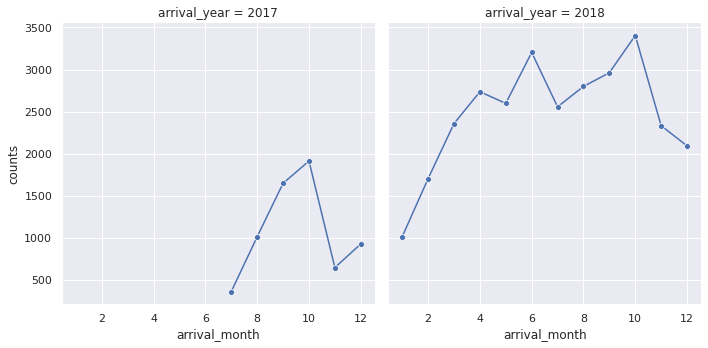

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the relplot used with seaborn library on the X-axis as arrival_month and dataframe 'df'

customer_per_year = df.groupby(['arrival_year','arrival_month']).size().reset_index()
customer_per_year.columns=['arrival_year','arrival_month','counts']
customer_per_year_sorts = customer_per_year.sort_values(by=['counts'], ascending=False)
#print (customer_per_year_sorts)

sns.relplot(data=customer_per_year_sorts, x='arrival_month', y ="counts", col="arrival_year", kind="line", marker="o");

####Observations####

1.   It is observed that in Year 2018, the busiest month is 10 with 3404 customers .
2. It is observed that in Year 2018, second busiest month is 6 with 3203 customers.
3.   It is observed that in Year 2017, the busiest month is 10 with 1913 customers.
4.   It is observed that in Year 2017, the second busiest month is 9 with 1649 customers.




# 2. Which market segment do most of the guests come from?

  market_segment_type  counts
4              Online   23214
3             Offline   10528
2           Corporate    2017
1       Complementary     391
0            Aviation     125


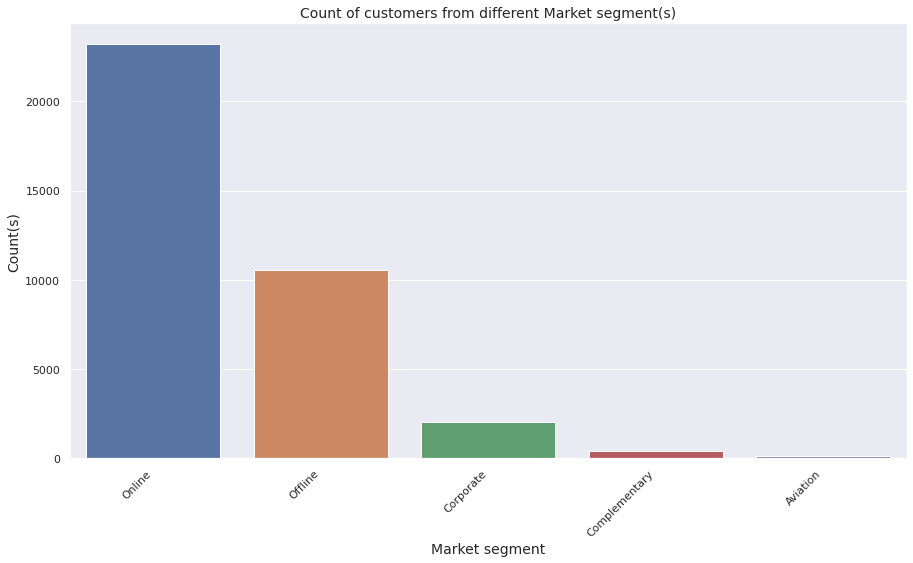

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,8))

sns.set(style="darkgrid")

# Below is the catplot used with seaborn library on the X-axis as market_segment_type and dataframe 'df'

customer_per_market_segment = df.groupby(['market_segment_type']).size().reset_index()
customer_per_market_segment.columns=['market_segment_type','counts']
customer_per_market_segment = customer_per_market_segment.sort_values(by=['counts'], ascending=False)
print (customer_per_market_segment)

sns.barplot(data=customer_per_market_segment, x='market_segment_type', y ='counts');
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Market segment', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('Count of customers from different Market segment(s)', fontsize=14);


####Observations####

1.   It is observed that maximum number of the guests (around 65%) come from online market segment.



# 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

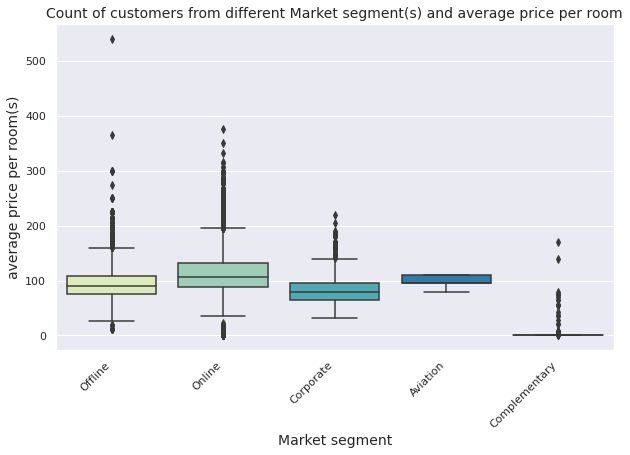

In [ ]:

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, x="market_segment_type", y="avg_price_per_room", palette="YlGnBu"
           )

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Market segment', fontsize=14)
plt.ylabel('average price per room(s)', fontsize=14)
plt.title ('Count of customers from different Market segment(s) and average price per room', fontsize=14);

plt.show()

####Observations####

1.   It is observed that Online booking are the highest according to the demand and customer demographics.
2.   It is observed that Aviation, Offline, Corporate are slightly lower priced in the cost per rooms when these demographics are considered.



# 4. What percentage of bookings are canceled?

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is the code to check the canceled orders and calculating the percentage

customer_bookings_canceled_df = df[df["booking_status"] == 'Canceled'].value_counts().reset_index()

perctg_customer_bookings_canceled_df = (len(customer_bookings_canceled_df) / len(df))  * 100

print ("Total number of cancellations are", len(customer_bookings_canceled_df))
print ("Total number of customers are", len(df))
print ("Percentage of customer bookings canceled are  {:.2f} %". format (perctg_customer_bookings_canceled_df))


Total number of cancellations are 11885
Total number of customers are 36275
Percentage of customer bookings canceled are  32.76 %


####Observations:

1.   It is observed that total number of cancellations are 11885.
2.   It is observed that total percentage of bookings canceled are around 32.76%



# 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is the code to check the canceled orders and for repeated guests and calculating the percentage

repeated_guests_bookings_canceled_df = df[(df["booking_status"] == 'Canceled') & (df['repeated_guest'] == 1)].value_counts().reset_index()

perctg_repeated_guests_bookings_canceled_df = (len(repeated_guests_bookings_canceled_df) / len(df))  * 100

print (len(repeated_guests_bookings_canceled_df))


print ("Percentage of customer bookings canceled are  {:.2f} %". format (perctg_repeated_guests_bookings_canceled_df))

16
Percentage of customer bookings canceled are  0.04 %


####Observations:

1.   It is observed that repeating guests cancel very rare and the percentage is very low.






# 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

   no_of_special_requests booking_status  counts
0                       0       Canceled    8545
1                       0   Not_Canceled   11232
2                       1       Canceled    2703
3                       1   Not_Canceled    8670
4                       2       Canceled     637
5                       2   Not_Canceled    3727
6                       3   Not_Canceled     675
7                       4   Not_Canceled      78
8                       5   Not_Canceled       8


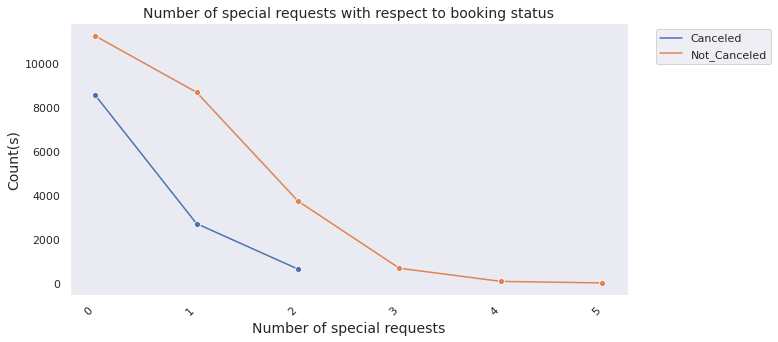

In [ ]:
''' Find out the  status of  booking, with respect to the number of special requests '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,5))


# Below is the code to group by on original dataframe and create a new dataframe

repeated_customers_meal_plan_pref = df.groupby(['no_of_special_requests','booking_status']).size().reset_index()
repeated_customers_meal_plan_pref.columns=['no_of_special_requests','booking_status','counts']
print (repeated_customers_meal_plan_pref)

sns.lineplot(data=repeated_customers_meal_plan_pref, x='no_of_special_requests', y='counts', marker="o", hue='booking_status');

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Number of special requests', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('Number of special requests with respect to booking status', fontsize=14);
plt.grid()

####Observations####

1.   It is observed that certain type of special requests like 0, 1, 2 have impact on the cancellations.
2.  It is observed that from 3rd special request the number of cancellations are no longer seen.



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

####Missing Values treatment

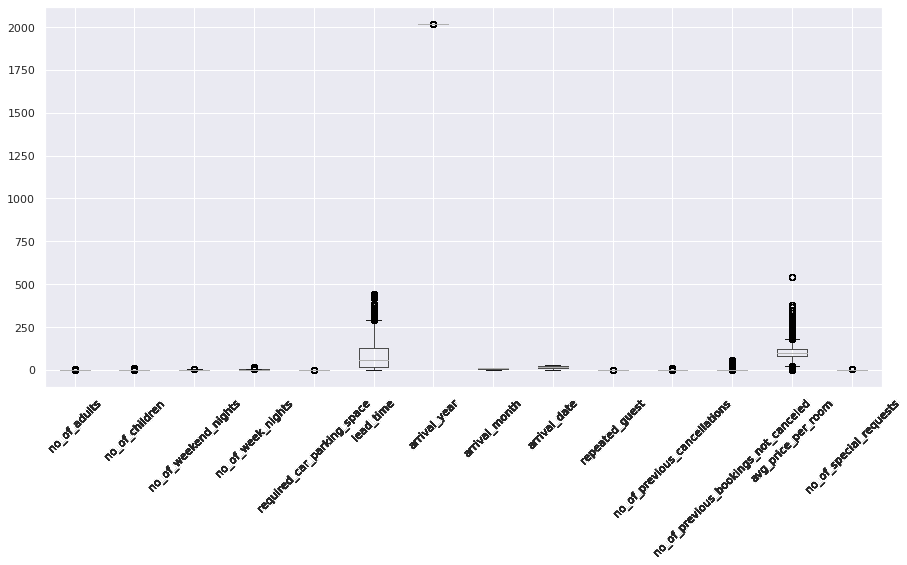

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))

for i, variable in enumerate(numeric_columns):
    df.boxplot()

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check the NULL values in the dataframe

print (df.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [ ]:
# we first create a copy of the data to avoid changes to it

df1 = df.copy()

In [ ]:
# encoding the booking_status column
df1['booking_status'] = df['booking_status'].map({'Canceled':0, 'Not_Canceled':1})

In [ ]:
# defining X and y variables

# Dropped both the columns repeated_guest and require_car_parking_space

X = df1.drop(["booking_status","Booking_ID"], axis=1)
y = df1["booking_status"]

print(X.head())
print(y.head())

# adding a contstant to X variable
X = add_constant(X)

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segm

In [ ]:
# encoding categorical variables

X = pd.get_dummies(
                   X,
                   columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True
                  )

print(X.shape)
X.head()

(36275, 28)


,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.00000,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.00000,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1.00000,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.00000,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.00000,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1


####Observations####

1.   It is observed that no missing or duplicates are found in the above object type data set and is ideally a good dataset.
2.   It is observed that the above **object** and **Category** data type columns will be considered for the oneHotEncoding for the transformation of the data.



## EDA

# - It is a good idea to explore the data once again after manipulating it.

# 1. What are the busiest months in the hotel?

<Figure size 720x576 with 0 Axes>

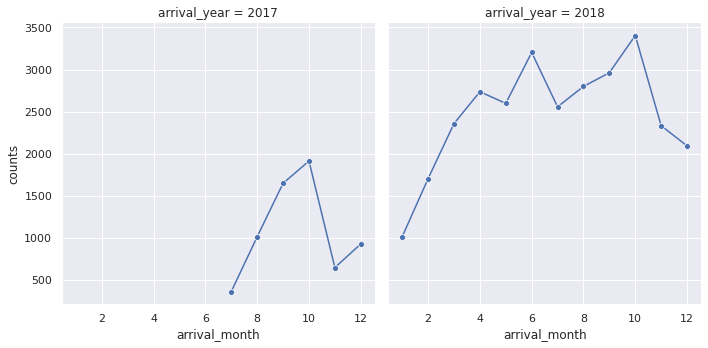

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,8))

sns.set(style="darkgrid")

# Below is the relplot used with seaborn library on the X-axis as arrival_month and dataframe 'df'

customer_per_year = df1.groupby(['arrival_year','arrival_month']).size().reset_index()
customer_per_year.columns=['arrival_year','arrival_month','counts']
customer_per_year_sorts = customer_per_year.sort_values(by=['counts'], ascending=False)
#print (customer_per_year_sorts)

sns.relplot(data=customer_per_year_sorts, x='arrival_month', y ="counts", col="arrival_year", kind="line", marker="o");

####Observations:

1.   It is observed that year 2018 and 10th month is the busiest month.



# 2. Which market segment do most of the guests come from?

  market_segment_type  counts
4              Online   23214
3             Offline   10528
2           Corporate    2017
1       Complementary     391
0            Aviation     125


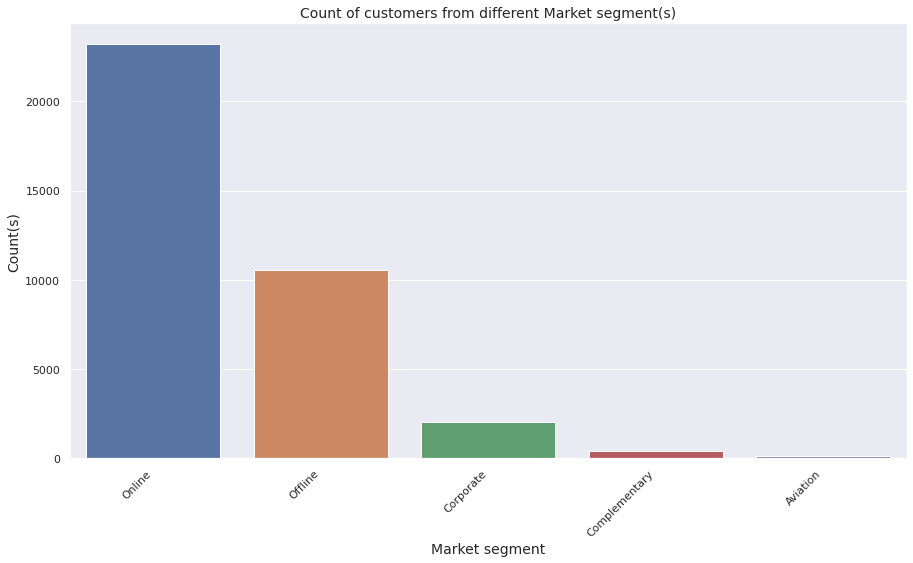

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(15,8))

sns.set(style="darkgrid")

# Below is the catplot used with seaborn library on the X-axis as market_segment_type and dataframe 'df'

customer_per_market_segment = df1.groupby(['market_segment_type']).size().reset_index()
customer_per_market_segment.columns=['market_segment_type','counts']
customer_per_market_segment = customer_per_market_segment.sort_values(by=['counts'], ascending=False)
print (customer_per_market_segment)

sns.barplot(data=customer_per_market_segment, x='market_segment_type', y ='counts');
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Market segment', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('Count of customers from different Market segment(s)', fontsize=14);

####Observations:

1.   It is observed that Online market has the most number of guests.
2.   It is observed that Offline, corporate, complementary and Aviation are the other market segments customers come from.



# 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

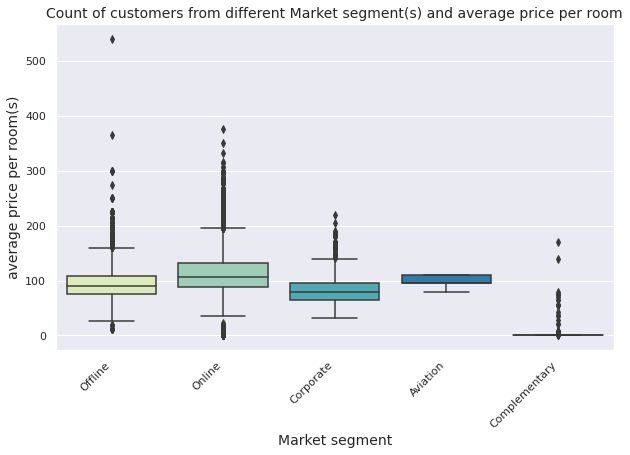

In [ ]:

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df1, x="market_segment_type", y="avg_price_per_room", palette="YlGnBu"
           )

plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Market segment', fontsize=14)
plt.ylabel('average price per room(s)', fontsize=14)
plt.title ('Count of customers from different Market segment(s) and average price per room', fontsize=14);

plt.show()

####Observations:

1.   It is observed that Online Market segment has the preference for the highest price per room.
2.   It is observed that Offline, Aviation and Corporate Market segment have lower price per room.



# 4. What percentage of bookings are canceled?

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is the code to check the canceled orders and calculating the percentage

customer_bookings_canceled_df = df1[df1["booking_status"] == 0].value_counts().reset_index()

perctg_customer_bookings_canceled_df = (len(customer_bookings_canceled_df) / len(df1))  * 100

print ("Total number of cancellations are", len(customer_bookings_canceled_df))
print ("Total number of customers are", len(df))
print ("Percentage of customer bookings canceled are  {:.2f} %". format (perctg_customer_bookings_canceled_df))

Total number of cancellations are 11885
Total number of customers are 36275
Percentage of customer bookings canceled are  32.76 %


####Observations:

1.   It is observed that Total bookings canceled are 11885.
2.   It is observed that total percentage bookings canceled are 32.76%





# 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Below is the code to check the canceled orders and for repeated guests and calculating the percentage

repeated_guests_bookings_canceled_df = df1[(df1["booking_status"] == 0) & (df1['repeated_guest'] == 1)].value_counts().reset_index()

perctg_repeated_guests_bookings_canceled_df = (len(repeated_guests_bookings_canceled_df) / len(df1))  * 100

#print (len(repeated_guests_bookings_canceled_df))


print ("Percentage of customer bookings canceled are  {:.2f} %". format (perctg_repeated_guests_bookings_canceled_df))

Percentage of customer bookings canceled are  0.04 %


####Observations:

1.   It is observed that repeated guests cacellation has decreased and 0, after the outlier treatment.
2.   It is observed that repeated guests cancellation indicates that guests were highly satisfied .



# 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

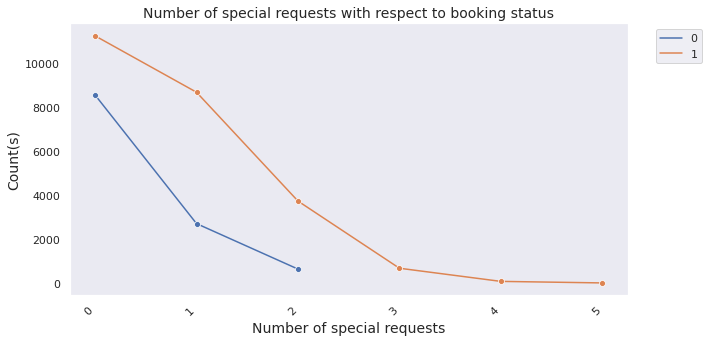

In [ ]:
''' Find out the  status of  booking, with respect to the number of special requests '''

# Below is used to plot the figure size as per dimensions

plt.figure(figsize=(10,5))


# Below is the code to group by on original dataframe and create a new dataframe

repeated_customers_meal_plan_pref = df1.groupby(['no_of_special_requests','booking_status']).size().reset_index()
repeated_customers_meal_plan_pref.columns=['no_of_special_requests','booking_status','counts']
#print (repeated_customers_meal_plan_pref)

sns.lineplot(data=repeated_customers_meal_plan_pref, x='no_of_special_requests', y='counts', marker="o", hue='booking_status');

# xticks is used to rotate the x label

plt.legend(bbox_to_anchor=(1.04, 1.0), loc='upper left')
plt.xticks(rotation= 45, ha='right');

# Below are used to represent the X-axis, Y-axis, Bar  titles respectively

plt.xlabel('Number of special requests', fontsize=14)
plt.ylabel('Count(s)', fontsize=14)
plt.title ('Number of special requests with respect to booking status', fontsize=14);
plt.grid()

####Observations:


1.   It is observed that number of cancelations were high with special request 0 .
2. It is observed that cancelations  gradually decreased with the special request 1 and 0.




In [ ]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [ ]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
1   0.67399
0   0.32601
Name: booking_status, dtype: float64
Percentage of classes in test set:
1   0.66857
0   0.33143
Name: booking_status, dtype: float64


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 29580 to 15795
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   required_car_parking_space            25392 non-null  int64  
 6   lead_time                             25392 non-null  int64  
 7   arrival_year                          25392 non-null  int64  
 8   arrival_month                         25392 non-null  int64  
 9   arrival_date                          25392 non-null  int64  
 10  repeated_guest                        25392 non-null  int64  
 11  no_of_previ

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39365451.93278
1,no_of_adults,1.34299
2,no_of_children,2.00637
3,no_of_weekend_nights,1.06511
4,no_of_week_nights,1.09149
5,required_car_parking_space,1.03707
6,lead_time,1.39281
7,arrival_year,1.43007
8,arrival_month,1.27171
9,arrival_date,1.00666


In [ ]:
#dropping the below column(s) , because they all have large Variance inflation factor values
X_train1 = X_train.drop([
                         'market_segment_type_Online'],
                       axis=1)

In [ ]:
checking_vif(X_train1)

,feature,VIF
0,const,39291689.90872
1,no_of_adults,1.32591
2,no_of_children,2.00540
3,no_of_weekend_nights,1.06439
4,no_of_week_nights,1.09028
5,required_car_parking_space,1.03704
6,lead_time,1.38817
7,arrival_year,1.42771
8,arrival_month,1.27096
9,arrival_date,1.00664


## Building a Logistic Regression model

In [ ]:
logit = sm.Logit(y_train, X_train1.astype(float))
lg = logit.fit()

         Current function value: 0.424660
         Iterations: 35


In [ ]:
# print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.3273
Time:                        15:16:14   Log-Likelihood:                -10783.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  837.7965    119.984      6.983      0.000     602.633    1072.960
no_of_adults                            -0.1207      

In [ ]:
# Predicting on training set,
# Default threshold is 0.5 , if predicted probability is greater than 5 we classify it as 1

pred_train = lg.predict(X_train1) > 0.5
pred_train = round(pred_train)

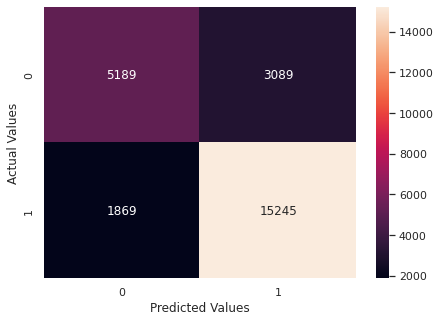

In [ ]:
# lets see the confusion matrix on the training set

cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

Accuracy on training set :  0.8047416509136736


####Observations:

1.   It is observed that model is performing good on the training set.



In [ ]:
X_train2 = X_train1.drop('type_of_meal_plan_Meal Plan 3',axis=1)

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit.fit()

pred_train1 = lg2.predict(X_train2)
pred_train1 = np.round(pred_train1)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train1))

         Current function value: 0.424704
         Iterations: 35
Accuracy on training set :  0.8047022684310019


####Observations:

1.   It is observed that no signficant change in the model performance as with initial model.



In [ ]:
# print the logistic regression summary
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.3273
Time:                        15:16:53   Log-Likelihood:                -10784.
converged:                      False   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  833.3650    119.918      6.949      0.000     598.331    1068.399
no_of_adults                            -0.1207      

In [ ]:

X_train3 = X_train2.drop('market_segment_type_Complementary',axis=1)

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit.fit()

pred_train2 = lg3.predict(X_train3)
pred_train2 = np.round(pred_train2)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train2))

Optimization terminated successfully.
         Current function value: 0.425234
         Iterations 12
Accuracy on training set :  0.8046628859483301


In [ ]:
# print the logistic regression summary
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.3264
Time:                        15:17:02   Log-Likelihood:                -10798.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  821.4440    119.756      6.859      0.000     586.727    1056.161
no_of_adults                            -0.1230      

In [ ]:
X_train4 = X_train3.drop('room_type_reserved_Room_Type 3',axis=1)

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit.fit()

pred_train3 = lg4.predict(X_train4)
pred_train3 = np.round(pred_train3)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train3))

Optimization terminated successfully.
         Current function value: 0.425237
         Iterations 12
Accuracy on training set :  0.8047022684310019


In [ ]:
# print the logistic regression summary
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.3264
Time:                        15:17:15   Log-Likelihood:                -10798.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  821.5171    119.755      6.860      0.000     586.802    1056.232
no_of_adults                            -0.1230      

In [ ]:
X_train5 = X_train4.drop('no_of_previous_bookings_not_canceled',axis=1)

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit.fit()

pred_train4 = lg5.predict(X_train5)
pred_train4 = np.round(pred_train4)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Optimization terminated successfully.
         Current function value: 0.425256
         Iterations 11
Accuracy on training set :  0.8047022684310019


In [ ]:
# print the logistic regression summary
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.3264
Time:                        15:17:22   Log-Likelihood:                -10798.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            820.6631    119.760      6.853      0.000     585.938    1055.388
no_of_adults                      -0.1230      0.037     -3.299      0.

In [ ]:
X_train6 = X_train5.drop('arrival_date',axis=1)

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit.fit()

pred_train5 = lg6.predict(X_train6)
pred_train5 = np.round(pred_train5)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train5))


Optimization terminated successfully.
         Current function value: 0.425289
         Iterations 11
Accuracy on training set :  0.8041115311909263


In [ ]:
# print the logistic regression summary
print(lg6.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.3263
Time:                        15:17:38   Log-Likelihood:                -10799.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            821.3218    119.783      6.857      0.000     586.551    1056.093
no_of_adults                      -0.1241      0.037     -3.330      0.

In [ ]:
X_train7 = X_train6.drop('no_of_children',axis=1)

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train7.astype(float))
lg7 = logit.fit()

pred_train6 = lg7.predict(X_train7)
pred_train6 = np.round(pred_train6)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train6))

Optimization terminated successfully.
         Current function value: 0.425350
         Iterations 11
Accuracy on training set :  0.8045053560176434


In [ ]:
# print the logistic regression summary
print(lg7.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Fri, 13 Jan 2023   Pseudo R-squ.:                  0.3262
Time:                        15:17:47   Log-Likelihood:                -10800.
converged:                       True   LL-Null:                       -16030.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            825.0606    119.754      6.890      0.000     590.346    1059.775
no_of_adults                      -0.1164      0.037     -3.144      0.

## Model performance evaluation

In [ ]:
# converting coefficients to odds
odds = np.exp(lg7.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train7.columns, columns=["odds"]).T

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
odds,inf,0.89012,0.88397,0.96692,5.48414,0.98462,0.66535,1.04574,17.22810,0.77279,0.98092,4.39818,0.84851,0.82089,1.44906,1.34828,2.02211,2.21393,3.31312,2.22803,5.96451


In [ ]:
# finding the percentage change
perc_change_odds = (np.exp(lg7.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train7.columns, columns=["change_odds%"]).T

,const,no_of_adults,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
change_odds%,inf,-10.98797,-11.60253,-3.30804,448.41361,-1.53785,-33.46520,4.57440,1622.80999,-22.72093,-1.90778,339.81808,-15.14934,-17.91136,44.90634,34.82806,102.21108,121.39327,231.31172,122.80291,496.45124


## Final Model Summary

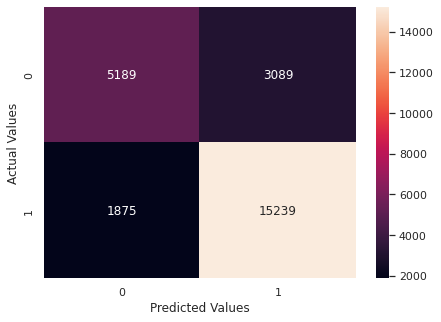

In [ ]:
# another confusion matrix
cm = confusion_matrix(y_train, pred_train6)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train6))

Accuracy on training set :  0.8045053560176434


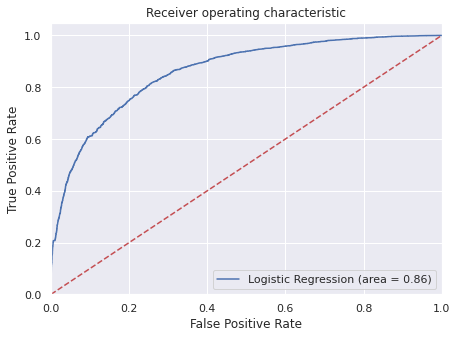

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg7.predict(X_train7))
fpr, tpr, thresholds = roc_curve(y_train, lg7.predict(X_train7))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# dropping variables from test set as well which were dropped from training set
X_test1 = X_test.drop([
                         'market_segment_type_Online',
                         'type_of_meal_plan_Meal Plan 3',
                         'market_segment_type_Complementary',
                         'room_type_reserved_Room_Type 3',
                         'no_of_previous_bookings_not_canceled',
                         'arrival_date',
                         'no_of_children'

                     ], axis=1)

In [ ]:
pred_test = lg7.predict(X_test1) > 0.5
pred_test = np.round(pred_test)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train6))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.8045053560176434
Accuracy on test set :  0.8068547275567398


## Building a Decision Tree model

In [ ]:
dt_data = X.astype(float)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [ ]:
# building a decision tree using the dtclassifier function
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#scoring the accuracy on train & test data
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  0.994210775047259
Accuracy on test set :  0.8728291831296517


In [ ]:
# checking the positive outcomes
y.sum(axis = 0)

24390

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth

    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

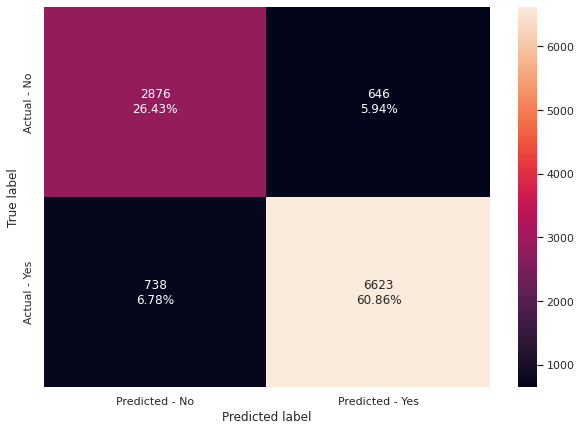

In [ ]:
# another confusion matrix
make_confusion_matrix(dTree,y_test)

In [ ]:
# check the recall on the train and test.
get_recall_score(dTree)

Recall on training set :  0.9957719184919842
Recall on test set :  0.8997418828963456


In [ ]:
the_features = list(X.columns)
print(the_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


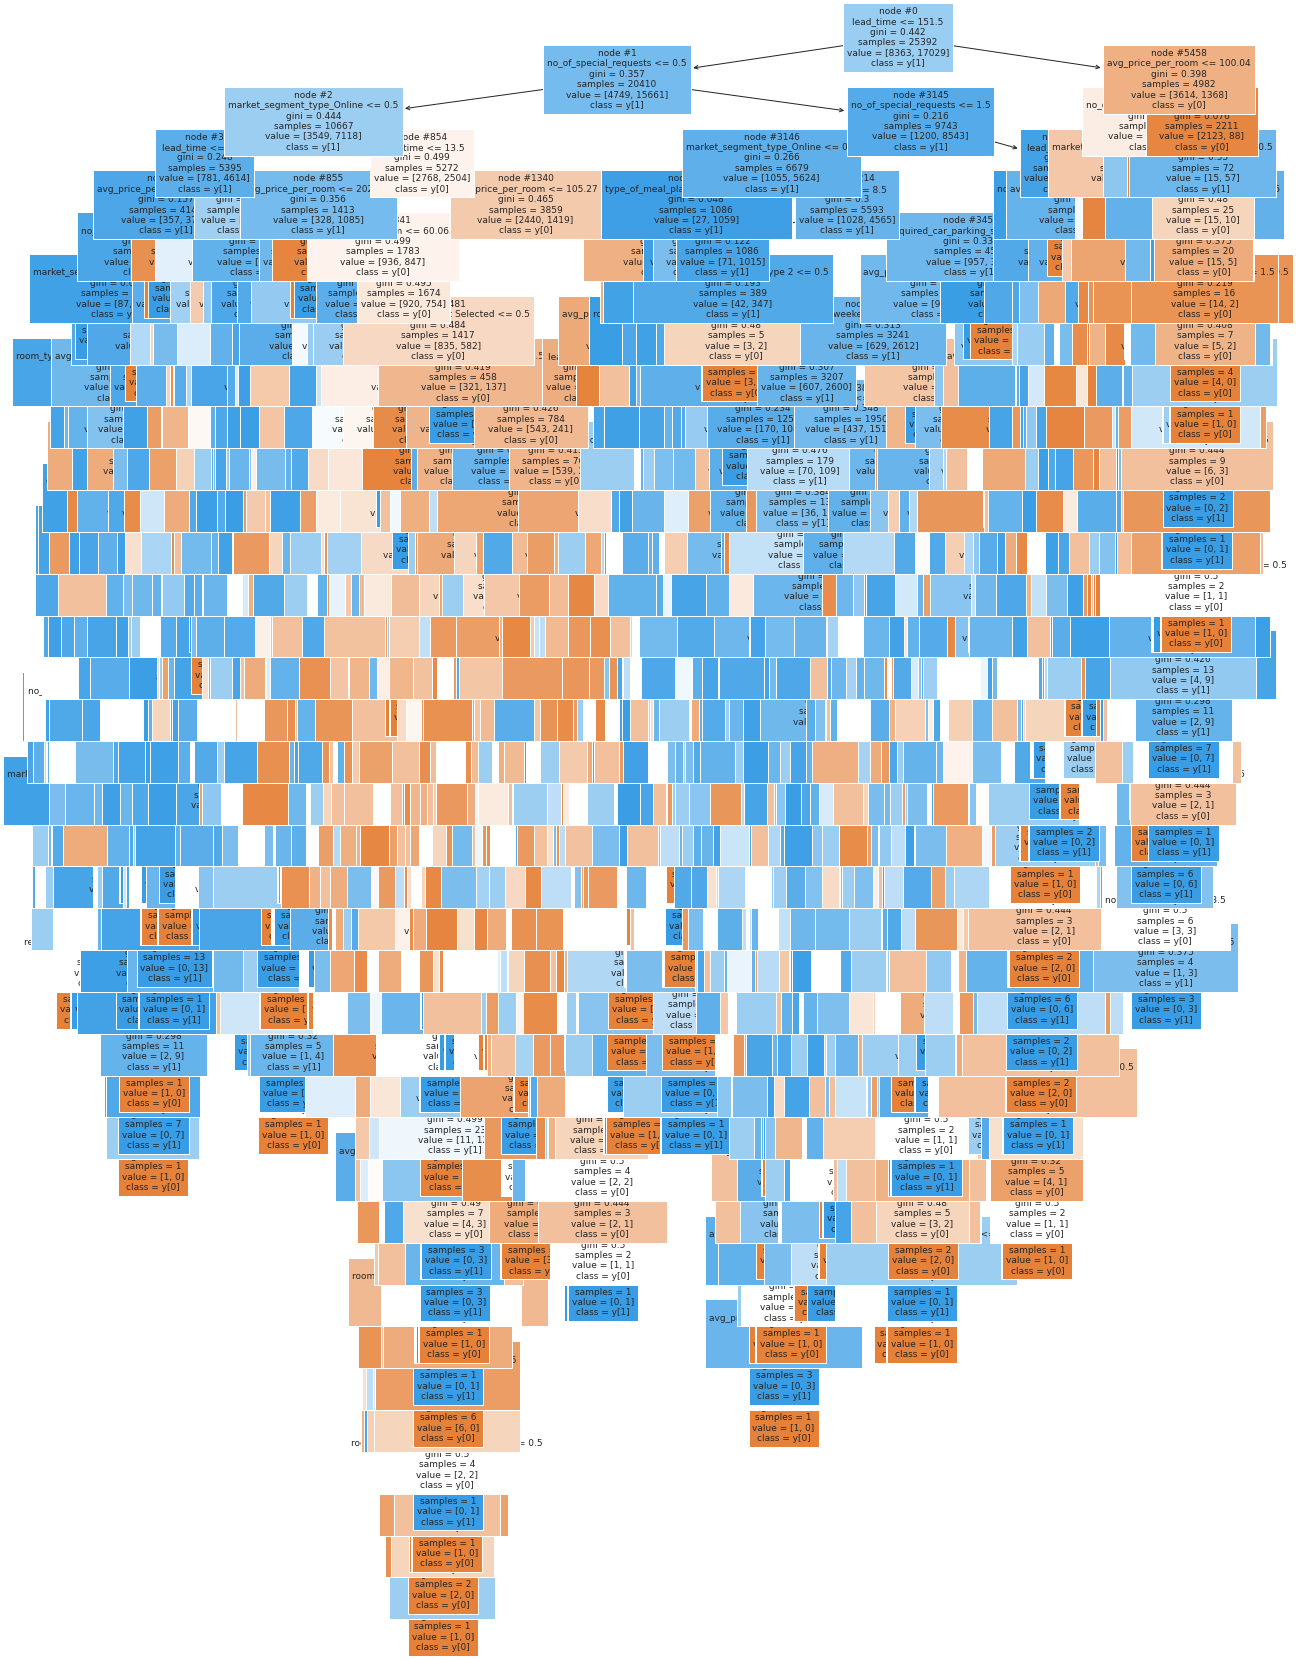

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# checking out what variables are being prioritized by the model.

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.35065
avg_price_per_room                   0.17573
market_segment_type_Online           0.09407
arrival_date                         0.08623
no_of_special_requests               0.06812
arrival_month                        0.06687
no_of_week_nights                    0.04474
no_of_weekend_nights                 0.03814
no_of_adults                         0.02622
arrival_year                         0.01161
type_of_meal_plan_Not Selected       0.00849
required_car_parking_space           0.00714
room_type_reserved_Room_Type 4       0.00621
type_of_meal_plan_Meal Plan 2        0.00372
no_of_children                       0.00330
market_segment_type_Offline          0.00251
room_type_reserved_Room_Type 2       0.00214
room_type_reserved_Room_Type 5       0.00177
market_segment_type_Corporate        0.00063
repeated_guest                       0.00045
room_type_reserved_Room_Type 7       0.00042
room_type_

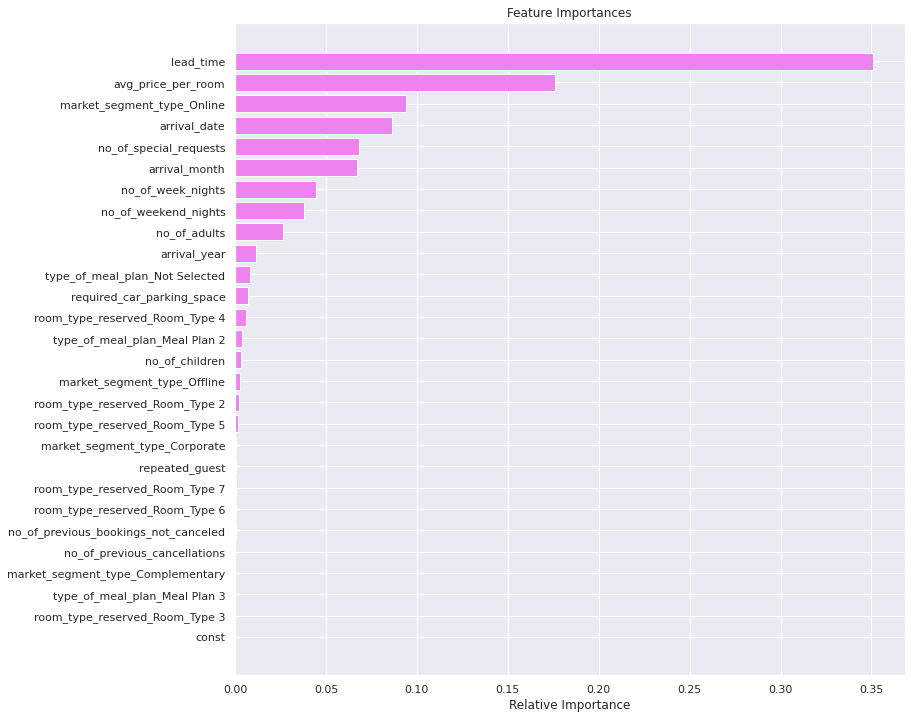

In [ ]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Do we need to prune the tree?

In [ ]:
# Pre prune the model with max depth hyperparameter
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

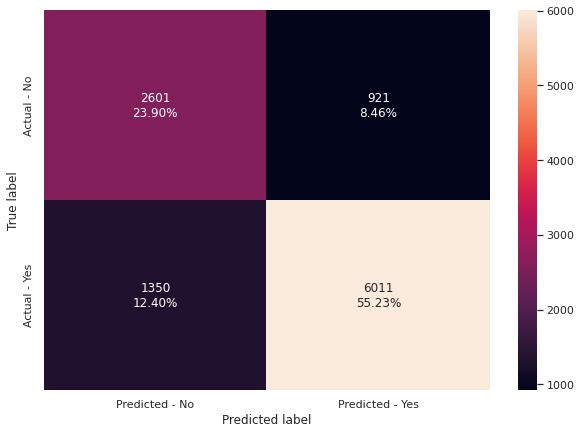

In [ ]:
# another confusion matrix
make_confusion_matrix(dTree1, y_test)

In [ ]:
# The accuracy on the pre pruned tree.
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Check the recall with the get_recall_score user defined function
get_recall_score(dTree1)

Accuracy on training set :  0.7844202898550725
Accuracy on test set :  0.7913259211614444
Recall on training set :  0.8103822890363498
Recall on test set :  0.8166010052981931


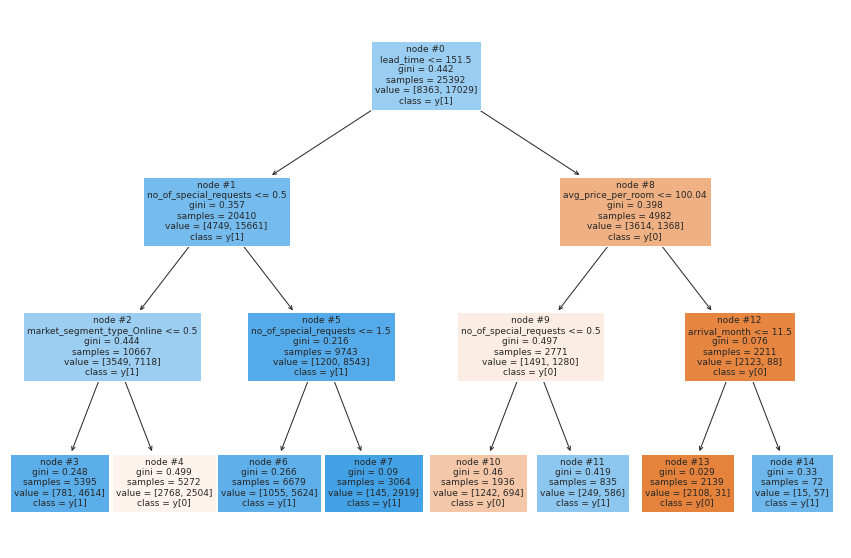

In [ ]:
# Let's see the pre pruned tree
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

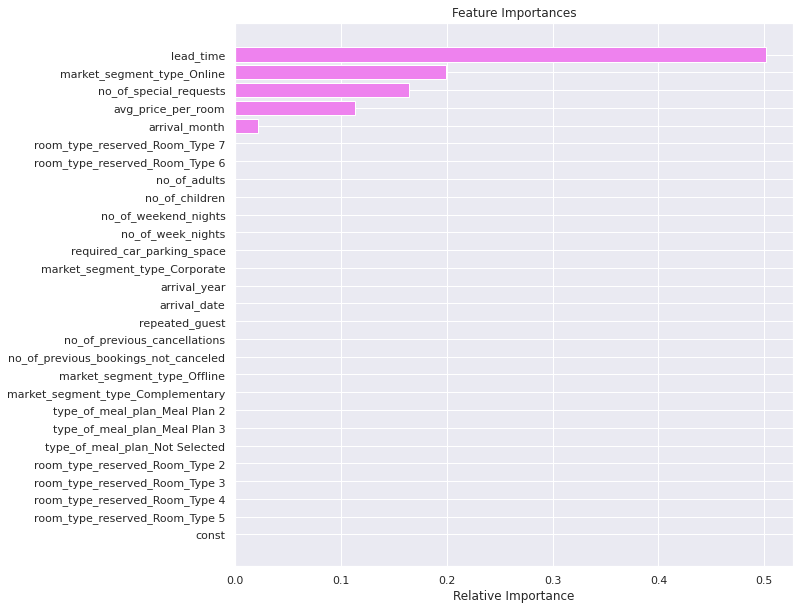

In [ ]:
# Looking at the feature importances of this model
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# scoring function used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

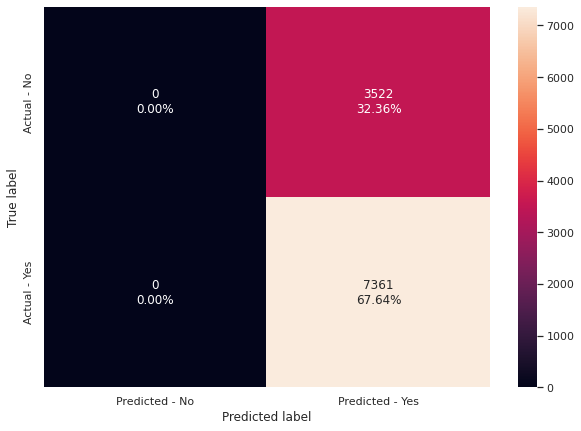

In [ ]:
# run the estimator in a confusion matrix
make_confusion_matrix(estimator,y_test)

In [ ]:
# The accuracy on the estimator tree.
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Check the recall with the get_recall_score user defined function
get_recall_score(dTree1)

Accuracy on training set :  0.6706442974165091
Accuracy on test set :  0.6763759992649085
Recall on training set :  0.8103822890363498
Recall on test set :  0.8166010052981931


In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00757
1,0.00000,0.00757
2,0.00000,0.00757
3,0.00000,0.00757
4,0.00000,0.00757
...,...,...
1342,0.00667,0.28690
1343,0.01304,0.29994
1344,0.01726,0.31720
1345,0.02399,0.36518


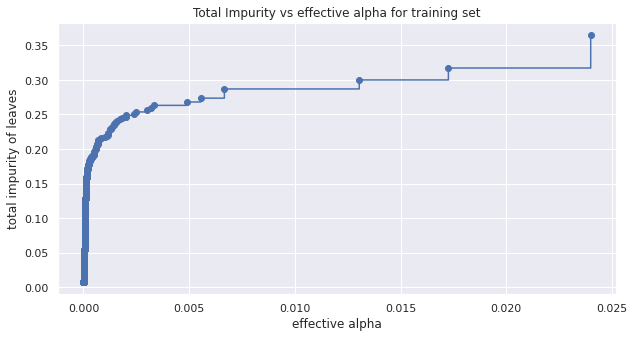

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=1,ccp_alpha=0.05)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- class: 1



In [ ]:
#Decision Tree classifier for every alpha

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368


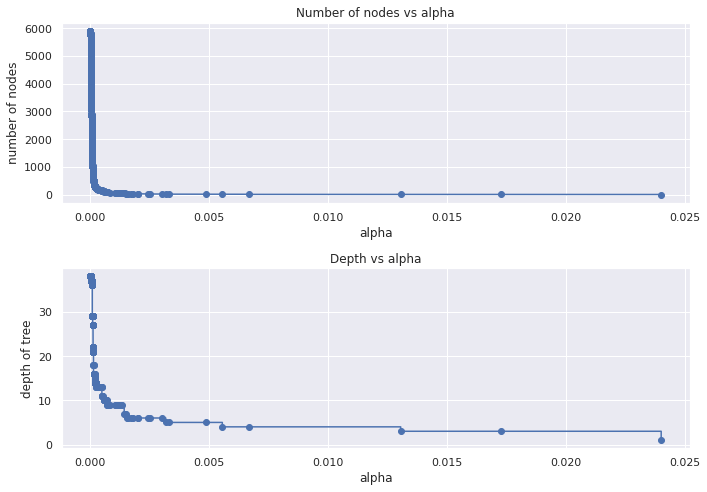

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

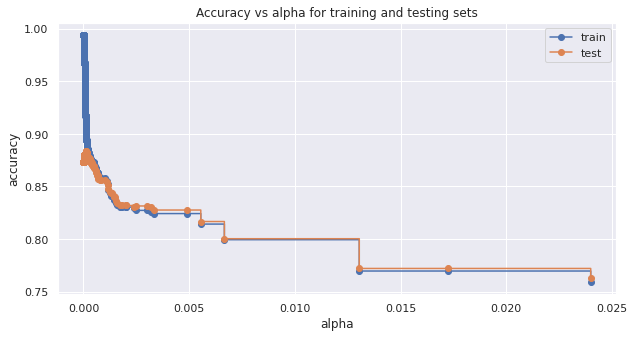

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00011736595788977046, random_state=1)
Training accuracy of best model:  0.9029615626969124
Test accuracy of best model:  0.8833961223927226


In [ ]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

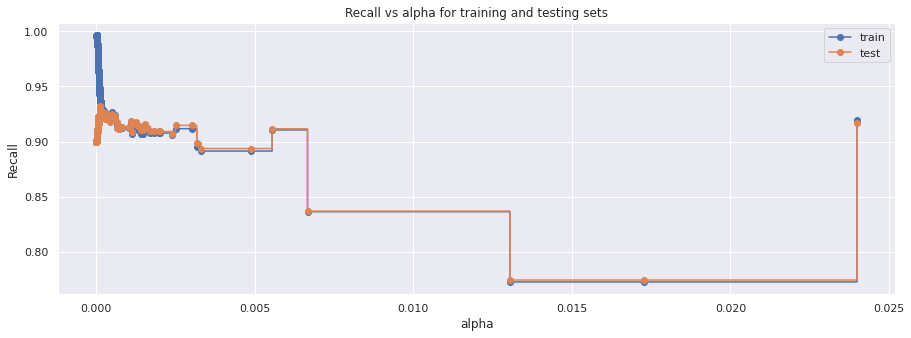

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

####Observations:

1.   It is observed that best model is at 0.005



## Model Performance Comparison and Conclusions

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012717831407730315, random_state=1)


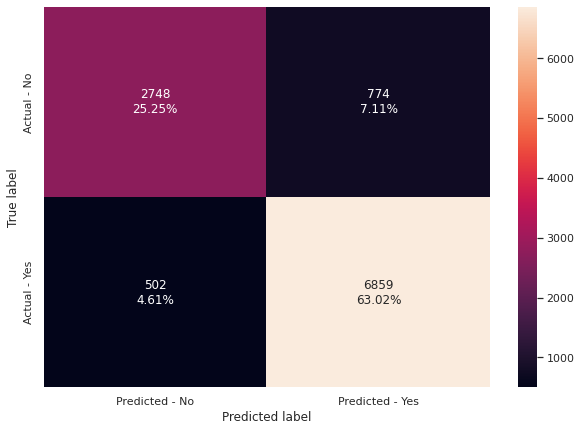

In [ ]:
#another confusion matrix
make_confusion_matrix(best_model,y_test)

In [ ]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  0.9417464325562276
Recall on test set :  0.9318027441923652


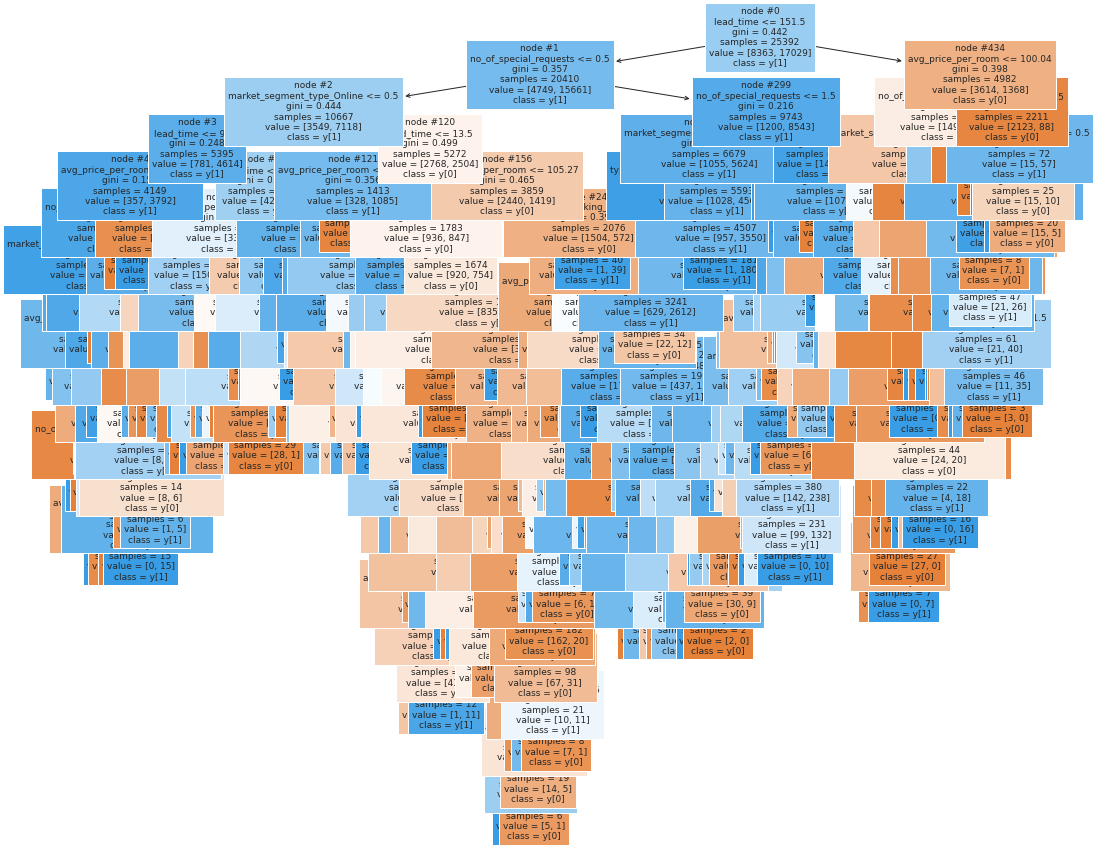

In [ ]:
# plot the additional tree
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=the_features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

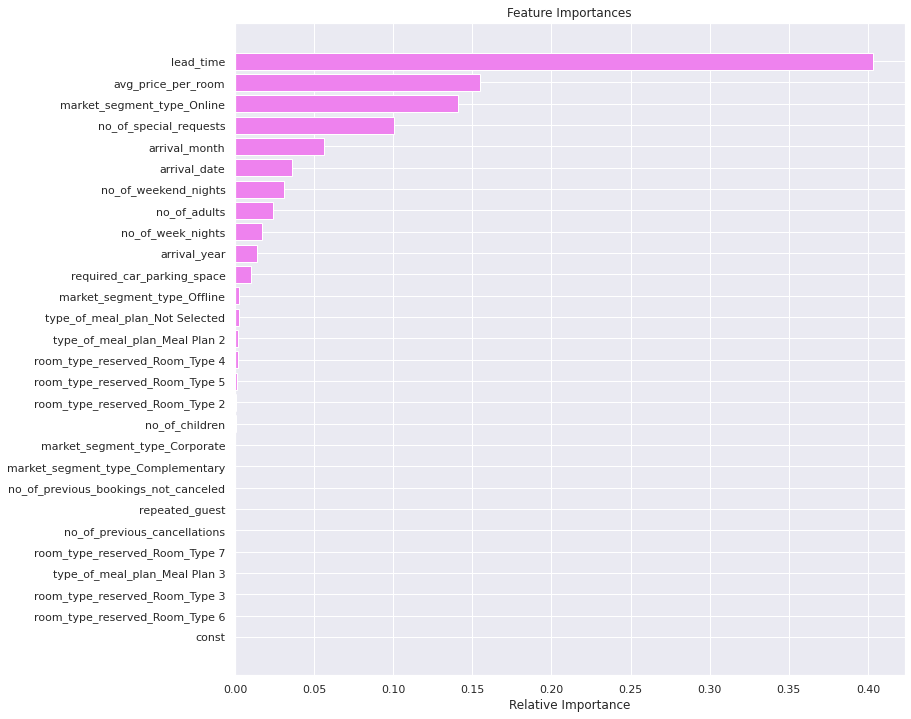

In [ ]:
# showing what metrics this model used
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [the_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision tree with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[.9957,.7315,.7315,.9417], 'Test_Recall':[.899,.739,.739,.9318]})
comparison_frame

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,0.99570,0.89900
1,Decision tree with restricted maximum depth,0.73150,0.73900
2,Decision tree with hyperparameter tuning,0.73150,0.73900
3,Decision tree with post-pruning,0.94170,0.93180


####Observations:

1.   It is observed that "Initial decision tree model " had the recall on train data as almost 100% and the recall on the test as almost 90% .
2. It is observed that "Decision tree with maximum depth" after restricting it was having recall on train data as 73% and recall on test as almost 74%.
3. It is observed that "Decision tree with hyper parameter tuning" has recall on train data as 73% and recall on teest as 74% which is good to see as the train and test model are similar or close .
4. It is observed that after the post-pruning the train recall has 94% and test recall has almost 93% .
5. The trees with restricted maximum tuning and hyperparameter tuning performed the best while reducing overfitting.
6. It is observed that decision tree with post-pruning is giving highest recall on the  training and test sets.


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?


*   The three most important variables in terms of cancellations were the  

    1.   lead time,
    2.   advance booking of the room
    3.   Number of special requests

*   It is observed that repeating guests have less number of cancellations, it would be great if some kind of membership reward program is offered to them.
*   It is observed that Online customers have highest number of cancellations and when the lead time increases.
*   In order to reduce the cancellations,  customer booking above the average lead time will not be provided any refund in order to reduce the cancellations.
*   It is observed that average room prices increase in the month of october.
*   Interestingly, it is observed that customers who made special requests have less cancellations.
*   Customers on an average cancelled the rooms 150 days before the lead time.
*   Since, customers have cancelled rooms 150 days before the lead time, it is ideal to have good deals before that .
*   For Children , It would be good  have some special play area to have cancellations decrease .
*   For overall, increase the breakfast and other features as well to have new customers booking increase.



















